## Objectif: 

L'objectif dans ce concours est de prédire si une personne sera en défaut sur un prêt dans l'ensemble de données test.csv. Vous recevrez deux ensembles de données: train.csv (contient les fonctionnalités et Credit Default comme cible) et test.csv (fonctionnalités uniquement).



# Nettotage des données 

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
import pandas as pd
df = pd.read_csv('../Bases/train.csv')

print(df.head())

   Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0            

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [138]:
import skimpy as sp

stats = sp.skim(df)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃       ┃          ┃          ┃        ┃        ┃         ┃         ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │    0 │     0 │     3750 │     2165 │      0 │   1875 │    3750 │    5624 │      7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │ 1557 │ 20.76 │  1366000 │   845300 │ 164600 │ 844300 │ 1168000 │ 1640000 │  10150000 │   ▇▂   │  │
│ │ Income     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Tax Liens  │    0 │     0 │  0.03013 │   0.2716 │      0 │      0 │       0 │       0 │         7 │   ▇    │  │
│ │ Number of  │    0 │     0 │    11.13 │    4.909 │      2 │      8 │      10 │      14 │        43 │  ▅▇▂   │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Accounts   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Years of   │    0 │     0 │    18.32 │    7.042 │      4 │   13.5 │      17 │    21.8 │      57.7 │  ▃▇▃▁  │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ History    │      │       │          │          │        │        │         │         │           │        │  │
│ │ Maximum    │    0 │     0 │   945200 │ 16030000 │      0 │ 279200 │  478200 │  793500 │ 130500000 │   ▇    │  │
│ │ Open       │      │       │          │          │        │        │         │         │         0 │        │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Number of  │    0 │     0 │     0.17 │   0.4986 │      0 │      0 │       0 │       0 │         7 │   ▇    │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Problems   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Months     │ 4081 │ 54.41 │    34.69 │    21.69 │      0 │     16 │      32 │      50 │       118 │ ▇▇▅▃▁  │  │
│ │ since last │      │       │          │          │        │        │         │         │           │        │  │
│ │ delinquent │      │       │          │          │        │        │         │         │           │        │  │
│ │ Bankruptci │   14 │  0.19 │   0.1172 │   0.3472 │      0 │      0 │       0 │       0 │         4 │   ▇▁   │  │
│ │ es         │      │       │          │          │   

None


In [139]:
#Gestion des valeurs manquantes
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

df['Years in current job'].fillna('Unknown', inplace=True) #Il s'agit d'une colonne catégorielle. Vous pouvez imputer une valeur comme "Unknown"

df['Months since last delinquent'].fillna(0, inplace=True) #remplir avec une valeur comme 0

df['Bankruptcies'].fillna(0, inplace=True) #hypothèse que les données manquantes signifient qu'il n'y a pas eu de faillite

# Remplacer les valeurs manquantes par la médiane
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)


In [140]:
print(df.isnull().sum()) #Colonnes avec des valeurs manquantes 

Id                              0
Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64


In [141]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation sur les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Afficher les corrélations spécifiques avec la variable 'Credit Score'
print(correlation_matrix['Credit Score'].sort_values(ascending=False))




Credit Score                    1.000000
Credit Default                  0.376220
Id                              0.033870
Number of Open Accounts         0.013952
Tax Liens                       0.008544
Monthly Debt                   -0.000489
Months since last delinquent   -0.000719
Current Credit Balance         -0.004781
Maximum Open Credit            -0.005160
Years of Credit History        -0.014030
Number of Credit Problems      -0.016497
Bankruptcies                   -0.024435
Annual Income                  -0.024780
Current Loan Amount            -0.083934
Name: Credit Score, dtype: float64


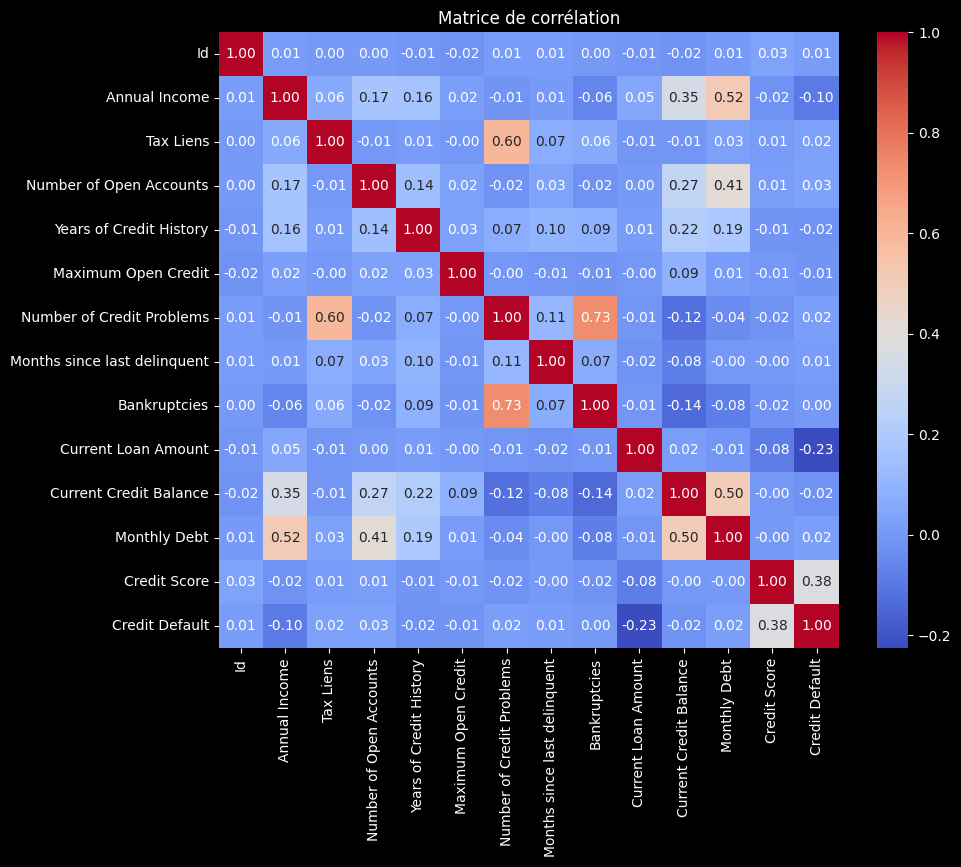

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


## Intrepretation:

On note une très faible correlation linéaire entre le Credit Score et les autre variables quantitative, par conséquent nous allons utiliser l'option Imputation par la médiane pour completer les données manquante. 

In [143]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles avec LabelEncoder
le = LabelEncoder()
df['Years in current job'] = le.fit_transform(df['Years in current job'].astype(str))

# Utilisation du One-Hot Encoding pour les autres variables catégorielles
df_encoded = pd.get_dummies(df, columns=['Home Ownership', 'Purpose', 'Term'])

# Vérification des types de colonnes
print(df_encoded.dtypes)

# Calcul de la matrice de corrélation après encodage
correlation_matrix_encoded = df_encoded.corr()

# Afficher les corrélations spécifiques avec 'Credit Score'
print(correlation_matrix_encoded['Credit Default'].sort_values(ascending=False))


Id                                int64
Annual Income                   float64
Years in current job              int64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
Home Ownership_Have Mortgage       bool
Home Ownership_Home Mortgage       bool
Home Ownership_Own Home            bool
Home Ownership_Rent                bool
Purpose_business loan              bool
Purpose_buy a car                  bool
Purpose_buy house                  bool
Purpose_debt consolidation         bool
Purpose_educational expenses       bool
Purpose_home improvements          bool


Analyse des résultats de corrélation :

La corrélation la plus élevée avec Credit Default est pour Credit Score (0.376), ce qui peut indiquer une relation modérée entre ces deux variables.
Term_Long Term et Term_Short Term ont des corrélations opposées (0.181 et -0.181), ce qui est logique car elles sont mutuellement exclusives dans un encodage one-hot.
Certaines colonnes ont des corrélations très faibles (proches de 0), ce qui peut indiquer qu'elles n'ont pas d'impact direct sur Credit Default.

## Conversion des colonnes booléennes en int

In [144]:
df_encoded = df_encoded.astype(int)
print(df_encoded.dtypes )


Id                              int64
Annual Income                   int64
Years in current job            int64
Tax Liens                       int64
Number of Open Accounts         int64
Years of Credit History         int64
Maximum Open Credit             int64
Number of Credit Problems       int64
Months since last delinquent    int64
Bankruptcies                    int64
Current Loan Amount             int64
Current Credit Balance          int64
Monthly Debt                    int64
Credit Score                    int64
Credit Default                  int64
Home Ownership_Have Mortgage    int64
Home Ownership_Home Mortgage    int64
Home Ownership_Own Home         int64
Home Ownership_Rent             int64
Purpose_business loan           int64
Purpose_buy a car               int64
Purpose_buy house               int64
Purpose_debt consolidation      int64
Purpose_educational expenses    int64
Purpose_home improvements       int64
Purpose_major purchase          int64
Purpose_medi

In [145]:
print(df_encoded.head())

   Id  Annual Income  Years in current job  Tax Liens  \
0   0         482087                    11          0   
1   1        1025487                     1          0   
2   2         751412                     8          0   
3   3         805068                     6          0   
4   4         776264                     8          0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                       11                       26               685960   
1                       15                       15              1181730   
2                       11                       35              1182434   
3                        8                       22               147400   
4                       13                       13               385836   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                          1                             0             1  ...   
1                          0          

## Normalisation eventuelle

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Sélectionner uniquement les colonnes numériques à normaliser (exclure 'Id')

numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(['Id', 'Credit Default'])

# Appliquer la normalisation uniquement aux colonnes numériques sélectionnées

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


In [147]:
print(df_encoded['Credit Default'].head()) 

0    0
1    1
2    0
3    0
4    0
Name: Credit Default, dtype: int64


In [148]:
print(correlation_matrix_encoded['Credit Default'].sort_values(ascending=False))

Credit Default                  1.000000
Credit Score                    0.376220
Term_Long Term                  0.181487
Home Ownership_Rent             0.060114
Purpose_business loan           0.042531
Purpose_small business          0.033661
Number of Open Accounts         0.028884
Purpose_renewable energy        0.026078
Tax Liens                       0.024368
Years in current job            0.020398
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Id                              0.012858
Home Ownership_Own Home         0.010260
Months since last delinquent    0.010110
Purpose_other                   0.010059
Purpose_medical bills           0.006112
Bankruptcies                    0.001640
Purpose_wedding                -0.001499
Purpose_take a trip            -0.001794
Purpose_vacation               -0.002305
Purpose_buy house              -0.002554
Purpose_buy a car              -0.008033
Purpose_moving                 -0.008512
Purpose_major pu

## Visualisation des corrélations

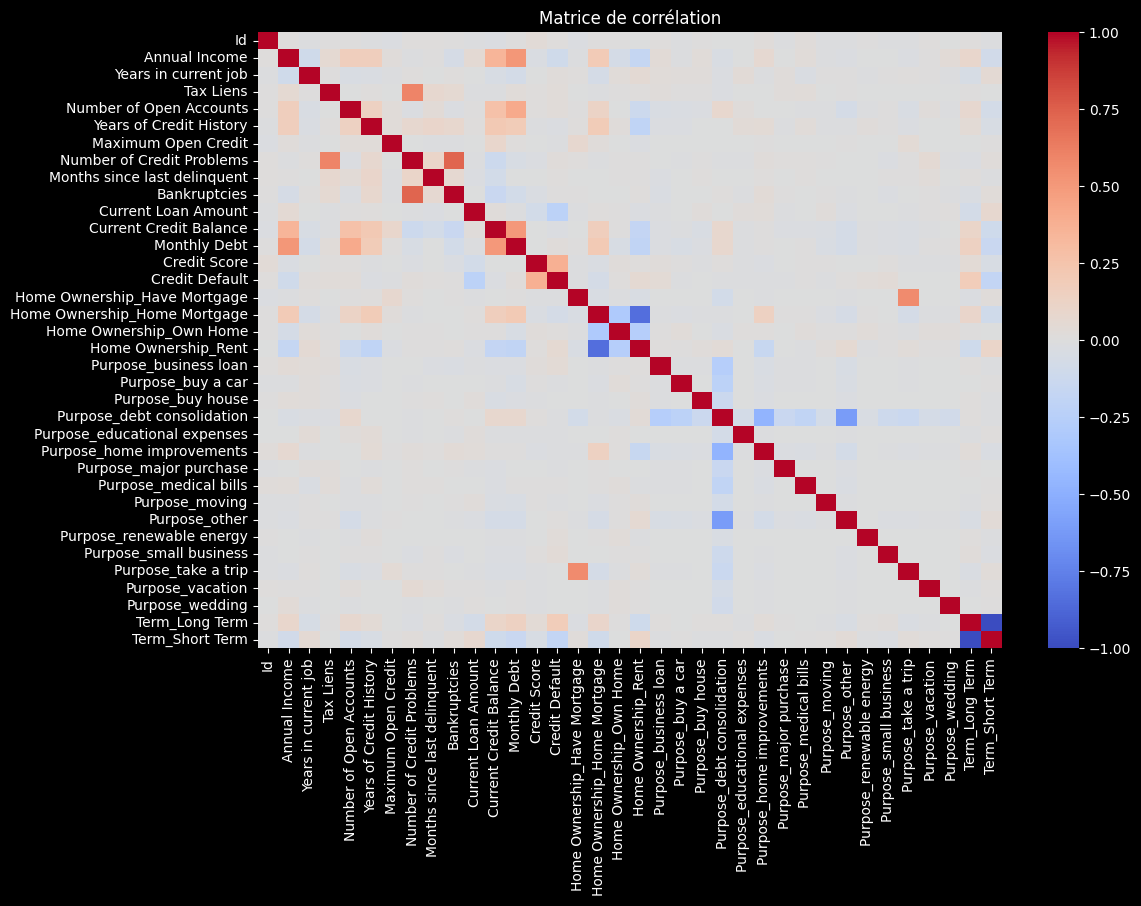

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()


In [150]:
print(df_encoded.head())
df_encoded.info()

   Id  Annual Income  Years in current job  Tax Liens  \
0   0      -1.114304              2.030975  -0.110953   
1   1      -0.396190             -0.878176  -0.110953   
2   2      -0.758385              1.158230  -0.110953   
3   3      -0.687478              0.576400  -0.110953   
4   4      -0.725543              1.158230  -0.110953   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                -0.026674                 1.150416            -0.016174   
1                 0.788223                -0.409823             0.014763   
2                -0.026674                 2.426975             0.014807   
3                -0.637847                 0.583057            -0.049781   
4                 0.380774                -0.693503            -0.034902   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                   1.664779                     -0.698307      2.545732  ...   
1                  -0.340979          

In [151]:
print(sp.skim(df_encoded))  # Résumé des statistiques avec skimpy

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7500   │ │ float64     │ 34    │                                                          │
│ │ Number of columns │ 36     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃           ┃        ┃          ┃          ┃          ┃           ┃        ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean      ┃ sd     ┃ p0       ┃ p25      ┃ p50      ┃ p75       ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │  0 │    0 │      3750 │   2165 │        0 │     1875 │     3750 │      5624 │   7499 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │  0 │    0 │ 5.969e-17 │      1 │   -1.534 │  -0.5209 │  -0.2073 │    0.2309 │  11.66 │   ▇▁   │  │
│ │ Income     │    │      │           │        │          │          │          │           │        │        │  │
│ │ Years in   │  0 │    0 │ 6.253e-17 │      1 │   -1.169 │  -0.8782 │  -0.2963 │    0.8673 │  2.031 │ ▇▃▃▂▂▃ │  │
│ │ current    │    │      │           │        │          │          │          │           │        │        │  │
│ │ job        │    │      │           │        │          │          │          │           │        │        │  │
│ │ Tax Liens  │  0 │    0 │ 2.274e-17 │      1 │   -0.111 │   -0.111 │   -0.111 │    -0.111 │  25.66 │   ▇    │  │
│ │ Number of  │  0 │    0 │ 3.647e-17 │      1 │    -1.86 │  -0.6378 │  -0.2304 │    0.5845 │  6.493 │  ▅▇▂   │  │
│ │ Open       │    │      │           │        │          │          │          │           │        │        │  │
│ │ Accounts   │    │      │           │        │          │          │          │           │        │        │  │
│ │ Years of   │  0 │    0 │ 2.937e-17 │      1 │    -1.97 │  -0.6935 │  -0.1261 │    0.4412 │  5.547 │  ▃▇▃▁  │  │
│ │ Credit     │    │      │           │        │          │          │          │           │        │        │  │
│ │ History    │    │      │           │        │          │          │          │           │        │        │  │
│ │ Maximum    │  0 │    0 │ -4.737e-1 │      1 │ -0.05898 │ -0.04155 │ -0.02914 │ -0.009463 │  81.36 │   ▇    │  │
│ │ Open       │    │      │         8 │        │          │          │          │           │        │        │  │
│ │ Credit     │    │      │           │        │          │          │          │           │        │        │  │
│ │ Number of  │  0 │    0 │ -7.011e-1 │      1 │   -0.341 │   -0.341 │   -0.341 │    -0.341 │   13.7 │   ▇    │  │
│ │ Credit     │    │      │         7 │        │          │          │          │           │        │        │  │
│ │ Problems   │    │      │           │        │          │          │          │           │        │        │  │
│ │ Months     │  0 │    0 │ -9.142e-1 │      1 │  -0.6983 │  -0.6983 │  -0.6983 │    0.5822 │  4.512 │  ▇▂▁▁  │  │
│ │ since last │    │      │         7 │        │          │          │          │           │        │        │  │
│ │ delinquent │    │      │           │        │       

None


In [19]:
print(df_encoded.head())


   Id  Annual Income  Years in current job  Tax Liens  \
0   0      -1.114304              2.030975  -0.110953   
1   1      -0.396190             -0.878176  -0.110953   
2   2      -0.758385              1.158230  -0.110953   
3   3      -0.687478              0.576400  -0.110953   
4   4      -0.725543              1.158230  -0.110953   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                -0.026674                 1.150416            -0.016174   
1                 0.788223                -0.409823             0.014763   
2                -0.026674                 2.426975             0.014807   
3                -0.637847                 0.583057            -0.049781   
4                 0.380774                -0.693503            -0.034902   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                   1.664779                     -0.698307      2.545732  ...   
1                  -0.340979          

# Analyse

In [152]:
import pandas as pd

# Charger les données brutes (entraînement)
train_df = df_encoded

# Charger les données prétraitées (test)
test_df = pd.read_csv('../Bases/test.csv')


In [153]:
print(train_df.head())
print(test_df.head())

   Id  Annual Income  Years in current job  Tax Liens  \
0   0      -1.114304              2.030975  -0.110953   
1   1      -0.396190             -0.878176  -0.110953   
2   2      -0.758385              1.158230  -0.110953   
3   3      -0.687478              0.576400  -0.110953   
4   4      -0.725543              1.158230  -0.110953   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                -0.026674                 1.150416            -0.016174   
1                 0.788223                -0.409823             0.014763   
2                -0.026674                 2.426975             0.014807   
3                -0.637847                 0.583057            -0.049781   
4                 0.380774                -0.693503            -0.034902   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                   1.664779                     -0.698307      2.545732  ...   
1                  -0.340979          

In [154]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2500 non-null   int64  
 1   Home Ownership                2500 non-null   object 
 2   Annual Income                 1987 non-null   float64
 3   Years in current job          2414 non-null   object 
 4   Tax Liens                     2500 non-null   float64
 5   Number of Open Accounts       2500 non-null   float64
 6   Years of Credit History       2500 non-null   float64
 7   Maximum Open Credit           2500 non-null   float64
 8   Number of Credit Problems     2500 non-null   float64
 9   Months since last delinquent  1142 non-null   float64
 10  Bankruptcies                  2497 non-null   float64
 11  Purpose                       2500 non-null   object 
 12  Term                          2500 non-null   object 
 13  Cur

In [155]:
import skimpy as sp

stats = sp.skim(test_df)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2500   │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃       ┃          ┃          ┃        ┃        ┃         ┃         ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Id         │    0 │     0 │     8750 │    721.8 │   7500 │   8125 │    8750 │    9374 │      9999 │ ▇▇▇▇▇▇ │  │
│ │ Annual     │  513 │ 20.52 │  1367000 │   917100 │ 106500 │ 852300 │ 1178000 │ 1630000 │  14980000 │   ▇    │  │
│ │ Income     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Tax Liens  │    0 │     0 │   0.0352 │   0.3863 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Number of  │    0 │     0 │    11.18 │    4.853 │      1 │      8 │      10 │      14 │        48 │  ▅▇▂   │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Accounts   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Years of   │    0 │     0 │    18.33 │    7.255 │    3.9 │   13.4 │      17 │    22.1 │      53.4 │  ▃▇▃▁  │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ History    │      │       │          │          │        │        │         │         │           │        │  │
│ │ Maximum    │    0 │     0 │   710600 │  1512000 │      0 │ 278600 │  478700 │  802600 │  54480000 │   ▇    │  │
│ │ Open       │      │       │          │          │        │        │         │         │           │        │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Number of  │    0 │     0 │    0.162 │   0.5599 │      0 │      0 │       0 │       0 │        15 │   ▇    │  │
│ │ Credit     │      │       │          │          │        │        │         │         │           │        │  │
│ │ Problems   │      │       │          │          │        │        │         │         │           │        │  │
│ │ Months     │ 1358 │ 54.32 │    34.18 │    22.02 │      0 │     16 │      30 │      50 │        82 │ ▆▇▆▅▃▃ │  │
│ │ since last │      │       │          │          │        │        │         │         │           │        │  │
│ │ delinquent │      │       │          │          │        │        │         │         │           │        │  │
│ │ Bankruptci │    3 │  0.12 │   0.1069 │   0.3572 │      0 │      0 │       0 │       0 │         5 │   ▇▁   │  │
│ │ es         │      │       │          │          │   

None


In [156]:
test_df.isna().sum()

Id                                 0
Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [157]:
#Gestion des valeurs manquantes
test_df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

test_df['Years in current job'].fillna('Unknown', inplace=True) #Il s'agit d'une colonne catégorielle. Vous pouvez imputer une valeur comme "Unknown"

test_df['Months since last delinquent'].fillna(0, inplace=True) #remplir avec une valeur comme 0

test_df['Bankruptcies'].fillna(0, inplace=True) #hypothèse que les données manquantes signifient qu'il n'y a pas eu de faillite

# Remplacer les valeurs manquantes par la médiane
test_df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)


In [158]:
test_df.isna().sum()

Id                              0
Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

In [160]:
from sklearn.preprocessing import LabelEncoder

# Encodage des colonnes catégorielles avec LabelEncoder
le = LabelEncoder()
test_df['Years in current job'] = le.fit_transform(test_df['Years in current job'].astype(str))

# Utilisation du One-Hot Encoding pour les autres variables catégorielles
test_df_encoded = pd.get_dummies(test_df, columns=['Home Ownership', 'Purpose', 'Term'])

# Vérification des types de colonnes
print(test_df_encoded.dtypes)



Id                                int64
Annual Income                   float64
Years in current job              int64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Home Ownership_Have Mortgage       bool
Home Ownership_Home Mortgage       bool
Home Ownership_Own Home            bool
Home Ownership_Rent                bool
Purpose_business loan              bool
Purpose_buy a car                  bool
Purpose_buy house                  bool
Purpose_debt consolidation         bool
Purpose_educational expenses       bool
Purpose_home improvements          bool
Purpose_major purchase             bool


## Conversion

In [161]:
test_df_encoded = test_df_encoded.astype(int)
print(test_df_encoded.dtypes )


Id                              int64
Annual Income                   int64
Years in current job            int64
Tax Liens                       int64
Number of Open Accounts         int64
Years of Credit History         int64
Maximum Open Credit             int64
Number of Credit Problems       int64
Months since last delinquent    int64
Bankruptcies                    int64
Current Loan Amount             int64
Current Credit Balance          int64
Monthly Debt                    int64
Credit Score                    int64
Home Ownership_Have Mortgage    int64
Home Ownership_Home Mortgage    int64
Home Ownership_Own Home         int64
Home Ownership_Rent             int64
Purpose_business loan           int64
Purpose_buy a car               int64
Purpose_buy house               int64
Purpose_debt consolidation      int64
Purpose_educational expenses    int64
Purpose_home improvements       int64
Purpose_major purchase          int64
Purpose_medical bills           int64
Purpose_movi

In [176]:
import skimpy as sp

stats = sp.skim(test_df_encoded)  # Obtenir les statistiques
print(stats)  # Afficher les statistiques

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2500   │ │ float64     │ 33    │                                                          │
│ │ Number of columns │ 34     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA ┃ NA % ┃ mean       ┃ sd    ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id          │  0 │    0 │       8750 │ 721.8 │     7500 │     8125 │     8750 │     9374 │   9999 │ ▇▇▇▇▇▇ │  │
│ │ Annual      │  0 │    0 │  9.663e-17 │     1 │   -1.485 │  -0.4744 │  -0.1921 │   0.1979 │  16.62 │   ▇    │  │
│ │ Income      │    │      │            │       │          │          │          │          │        │        │  │
│ │ Years in    │  0 │    0 │ -4.405e-17 │     1 │   -1.174 │  -0.8787 │  -0.2879 │   0.8939 │  2.076 │ ▇▃▃▂▂▂ │  │
│ │ current job │    │      │            │       │          │          │          │          │        │        │  │
│ │ Tax Liens   │  0 │    0 │ -7.461e-18 │     1 │ -0.09114 │ -0.09114 │ -0.09114 │ -0.09114 │  38.75 │   ▇    │  │
│ │ Number of   │  0 │    0 │ -2.558e-17 │     1 │   -2.099 │  -0.6563 │  -0.2441 │   0.5803 │  7.588 │  ▅▇▂   │  │
│ │ Open        │    │      │            │       │          │          │          │          │        │        │  │
│ │ Accounts    │    │      │            │       │          │          │          │          │        │        │  │
│ │ Years of    │  0 │    0 │ -7.105e-17 │     1 │   -2.053 │   -0.675 │  -0.1239 │    0.565 │  4.836 │  ▃▇▅▁  │  │
│ │ Credit      │    │      │            │       │          │          │          │          │        │        │  │
│ │ History     │    │      │            │       │          │          │          │          │        │        │  │
│ │ Maximum     │  0 │    0 │  -4.37e-17 │     1 │  -0.4701 │  -0.2858 │  -0.1534 │  0.06088 │  35.57 │   ▇    │  │
│ │ Open Credit │    │      │            │       │          │          │          │          │        │        │  │
│ │ Number of   │  0 │    0 │  3.695e-17 │     1 │  -0.2894 │  -0.2894 │  -0.2894 │  -0.2894 │  26.51 │   ▇    │  │
│ │ Credit      │    │      │            │       │          │          │          │          │        │        │  │
│ │ Problems    │    │      │            │       │          │          │          │          │        │        │  │
│ │ Months      │  0 │    0 │ -4.547e-17 │     1 │  -0.6905 │  -0.6905 │  -0.6905 │   0.5035 │  2.936 │ ▇▁▁▁▁▁ │  │
│ │ since last  │    │      │            │       │          │          │          │          │        │        │  │
│ │ delinquent  │    │      │            │       │          │          │          │          │        │        │  │
│ │ Bankruptcie │  0 │    0 │ -4.547e-17 │     1 │  -0.2992 │  -0.2992 │  -0.2992 │  -0.2992 │  13.71 │   ▇▁   │  │
│ │ s           │    │      │            │       │          │          │          │          │        │        │  │
│ │ Current     │  0 │    0 │  2.984e-17 │     1 │  -0.3

None


In [177]:
print(test_df_encoded.columns)

Index(['Id', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_business loan', 'Purpose_buy a car', 'Purpose_buy house',
       'Purpose_debt consolidation', 'Purpose_educational expenses',
       'Purpose_home improvements', 'Purpose_major purchase',
       'Purpose_medical bills', 'Purpose_moving', 'Purpose_other',
       'Purpose_small business', 'Purpose_take a trip', 'Purpose_vacation',
       'Purpose_wedding', 'Term_Long Term', 'Term_Short Term'],
      dtype='object')


In [179]:
print(train_df.columns)

Index(['Id', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Credit Default', 'Home Ownership_Have Mortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_business loan', 'Purpose_buy a car',
       'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding',
       'Term_Long Term', 'Term_Short Term'],
      dtype='object')


In [180]:
# Identifier les colonnes manquantes dans test_df_encoded
missing_cols = set(train_df.columns) - set(test_df_encoded.columns)

# Ajouter les colonnes manquantes avec des zéros
for col in missing_cols:
    test_df_encoded[col] = 0

# Réordonner les colonnes pour correspondre à l'ordre de train_df (sauf la colonne cible)
test_df_encoded = test_df_encoded[train_df.drop(columns='Credit Default').columns]


## Normalisation

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Sélectionner uniquement les colonnes numériques à normaliser (exclure 'Id')

numerical_columns = test_df_encoded.select_dtypes(include=['float64', 'int64']).columns.difference(['Id', 'Credit Default'])

# Appliquer la normalisation uniquement aux colonnes numériques sélectionnées

test_df_encoded[numerical_columns] = scaler.fit_transform(test_df_encoded[numerical_columns])

In [182]:
test_df_encoded.shape


(2500, 35)

In [183]:
train_df.shape

(7500, 36)

In [184]:
test_df= test_df_encoded

In [185]:
print(train_df.head())
print(test_df.head())

   Id  Annual Income  Years in current job  Tax Liens  \
0   0      -1.114304              2.030975  -0.110953   
1   1      -0.396190             -0.878176  -0.110953   
2   2      -0.758385              1.158230  -0.110953   
3   3      -0.687478              0.576400  -0.110953   
4   4      -0.725543              1.158230  -0.110953   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                -0.026674                 1.150416            -0.016174   
1                 0.788223                -0.409823             0.014763   
2                -0.026674                 2.426975             0.014807   
3                -0.637847                 0.583057            -0.049781   
4                 0.380774                -0.693503            -0.034902   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                   1.664779                     -0.698307      2.545732  ...   
1                  -0.340979          

## Préparer les données


In [186]:
# Variables prédictives et cible pour l'entraînement
X_train = train_df.drop(columns=['Credit Default'])  # Supprimer la cible
y_train = train_df['Credit Default']


In [187]:
# Variables prédictives et cible pour le test
X_test = test_df  # Supprimer la cible 



In [189]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")



X_train shape: (7500, 35)
y_train shape: (7500,)
X_test shape: (2500, 35)


## Entraînement des modèles

In [190]:
print(y_train.head())  # Vérifier les premières valeurs de y_train
  

0    0
1    1
2    0
3    0
4    0
Name: Credit Default, dtype: int64


## Diviser en données d'entraînement et de validation

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## arbre de décision

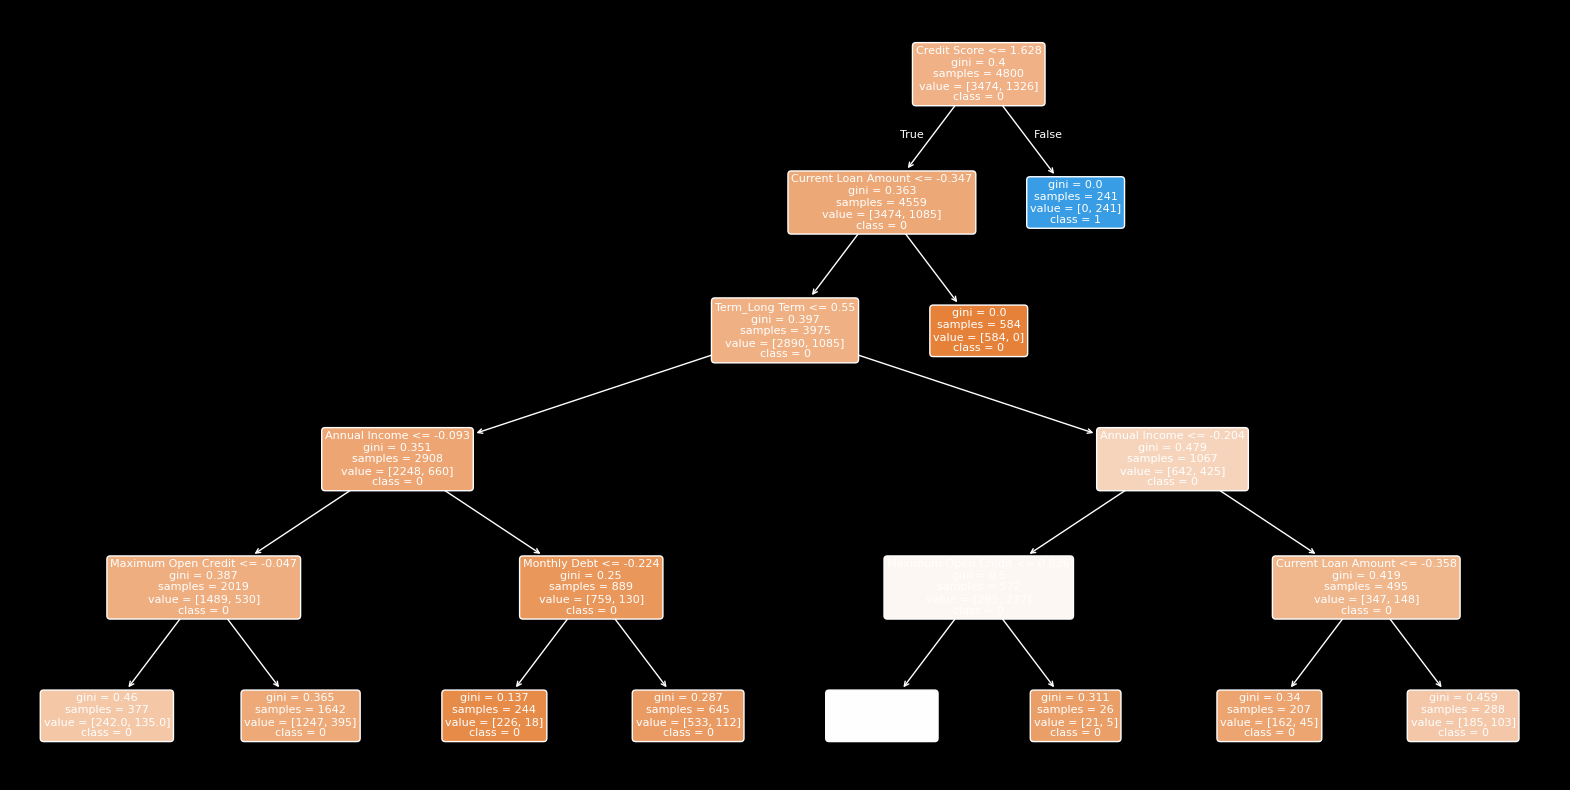

Accuracy sur les données de validation: 0.7725
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       854
           1       1.00      0.21      0.35       346

    accuracy                           0.77      1200
   macro avg       0.88      0.61      0.61      1200
weighted avg       0.83      0.77      0.71      1200



In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Initialiser un classificateur
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)


plt.figure(figsize=(20,10))  # Ajuste la taille de l'image selon la taille de ton arbre
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

# Évaluer les performances sur les données de validation
y_pred_val = clf.predict(X_val)
print("Accuracy sur les données de validation:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Prédictions sur le test set
#y_pred_ad = clf.predict(X_test)




## Conclusion

1. Accuracy (Précision globale)
Accuracy = 0.7745
Cela signifie que 77,45 % des prédictions du modèle sont correctes. C'est la proportion des prédictions correctes (que la prédiction soit pour la classe 0 ou 1) parmi l'ensemble des prédictions réalisées. Cependant, l'accuracy peut être trompeuse si les classes sont déséquilibrées.



2. Precision, Recall, et F1-score pour chaque classe :
Les métriques suivantes sont calculées pour chaque classe (0 et 1) du modèle.

Classe 0 (la classe majoritaire dans ce cas)
Precision = 0.80 :
Sur toutes les prédictions faites comme étant de la classe 0, 80 % étaient correctes. Autrement dit, si le modèle prédit que l'observation appartient à la classe 0, il a 80 % de chances de faire une prédiction correcte.


Recall = 0.92 :
Parmi toutes les vraies instances de la classe 0, 92 % ont été correctement identifiées par le modèle. Cela indique que le modèle est assez bon pour identifier la classe 0, mais il y a encore 8 % des exemples de la classe 0 qui sont manqués.


F1-score = 0.85 :
L'F1-score est une moyenne harmonique entre la precision et le recall. C'est une métrique utile quand on veut un compromis entre les deux, particulièrement dans des contextes où l'on veut éviter à la fois de fausses alertes (fausses positives) et des faux négatifs. Ici, le modèle montre un bon équilibre pour la classe 0.

Classe 1 (la classe minoritaire)
Precision = 0.67 :

Sur toutes les prédictions faites comme étant de la classe 1, 67 % étaient correctes. Le modèle semble avoir plus de mal à prédire correctement la classe 1 que la classe 0.


Recall = 0.40 :
Parmi toutes les vraies instances de la classe 1, 40 % ont été correctement identifiées. Cela suggère que le modèle a des difficultés à reconnaître la classe 1, et il manque 60 % des exemples de cette classe.


F1-score = 0.50 :
L'F1-score pour la classe 1 est relativement faible, ce qui reflète une combinaison de précision et de rappel qui n'est pas idéale. Cela montre que le modèle a un équilibre défavorable pour cette classe.

3. Métriques moyennes (macro et weighted avg)
Macro avg :
Precision = 0.73, Recall = 0.66, F1-score = 0.68 :
Ces valeurs sont les moyennes des métriques pour les deux classes, calculées sans tenir compte du déséquilibre des classes. La macro moyenne donne une idée générale de la performance du modèle sur toutes les classes, indépendamment de leur fréquence dans les données.


Weighted avg :
Precision = 0.76, Recall = 0.77, F1-score = 0.75 :
La weighted moyenne prend en compte la fréquence des classes dans le dataset (plus de 5000 instances de la classe 0 contre environ 2100 pour la classe 1). Ces valeurs montrent qu'en pondérant par la taille des classes, le modèle est un peu plus performant sur la classe 0, mais reste assez équilibré.


En conclusion:
Le modèle est globalement performant, mais il a un déséquilibre de performance entre les deux classes :


Il fait un très bon travail pour prédire la classe 0, avec une précision élevée (80 %) et un rappel élevé (92 %).


Cependant, il a plus de mal avec la classe 1, avec un rappel faible (40 %) et un F1-score assez bas (50 %), ce qui suggère que le modèle manque beaucoup de cas positifs pour cette classe.


Cela pourrait être dû à un déséquilibre de classes (plus d'exemples de la classe 0 que de la classe 1)

## Matrice de Confusion :


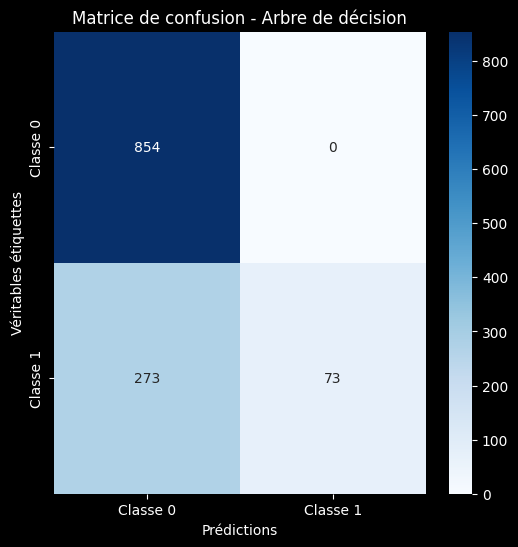

In [210]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_val, y_pred_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Arbre de décision')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


## Courbe de ROC et AUC

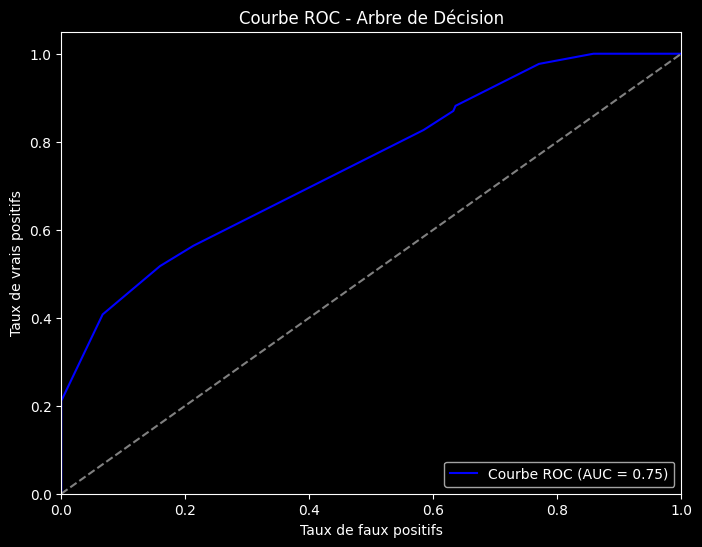

In [211]:
from sklearn.metrics import roc_curve, auc

# Obtenez les probabilités de la classe positive (classe 1)
y_prob_val = clf.predict_proba(X_val)[:, 1]  # Probabilité de la classe 1

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc='lower right')
plt.show()


### Interpretation: 

Un AUC de 0.76 indique que le modèle a une bonne capacité à distinguer entre les classes, mais il n'est pas parfait

## Régression logistique :




In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser un modèle de régression logistique
log_reg = LogisticRegression(random_state=42)

# Entraîner le modèle
log_reg.fit(X_train, y_train)

#Après avoir entraîné le modèle, nous allons faire des prédictions sur l'ensemble du jeu de validation
# Faire des prédictions sur les données de validation

y_pred_log_reg_val = log_reg.predict(X_val)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg_val))
print(classification_report(y_val, y_pred_log_reg_val))


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       854
           1       0.82      0.30      0.44       346

    accuracy                           0.78      1200
   macro avg       0.80      0.64      0.65      1200
weighted avg       0.79      0.78      0.74      1200



## Conclusion : 

1- Accuracy : 77.59%
L'accuracy mesure la proportion globale des prédictions correctes. Ici, le modèle prédit correctement 77,59 % des cas. Bien que ce soit un bon résultat, ce chiffre seul ne suffit pas à évaluer la performance du modèle, surtout si les classes sont déséquilibrées.

2 - Precision, Recall et F1-Score pour la classe 0 (Non-défaillant) :
Precision = 0.77 : Cela signifie que parmi toutes les prédictions faites par le modèle comme étant "0" (non défaut), 77 % étaient correctes.


Recall = 0.98 : Cela signifie que parmi tous les vrais cas "0", le modèle a réussi à en prédire 98 %. Cela indique que le modèle est très bon pour détecter les non-défaillants.


F1-Score = 0.86 : Le F1-score est une moyenne harmonique entre la précision et le rappel, donc ici, il est relativement élevé, ce qui signifie que le modèle a une bonne capacité à détecter les cas de "0" tout en minimisant les faux positifs.

3- Precision, Recall et F1-Score pour la classe 1 (Défaillant) :
Precision = 0.82 : Cela signifie que parmi toutes les prédictions faites par le modèle comme étant "1" (défaut), 82 % étaient correctes.

Recall = 0.26 : Ici, seulement 26 % des vrais cas "1" ont été détectés. C'est un faible score, ce qui signifie que le modèle a du mal à identifier les clients en défaut.

F1-Score = 0.40 : Ce score est également faible, ce qui reflète une mauvaise performance du modèle pour prédire les défauts

4- Macro et Weighted Averages :
Macro avg : Cela donne une moyenne simple des scores de chaque classe (sans tenir compte de la proportion des classes), ce qui donne un score de 0.80 pour la précision, 0.62 pour le rappel et 0.63 pour le F1-score.

Weighted avg : Cette moyenne prend en compte la distribution des classes. Ici, la précision et le rappel sont équilibrés à 0.79 et 0.78 respectivement, avec un F1-score global de 0.73.


## Matrice de confusion:

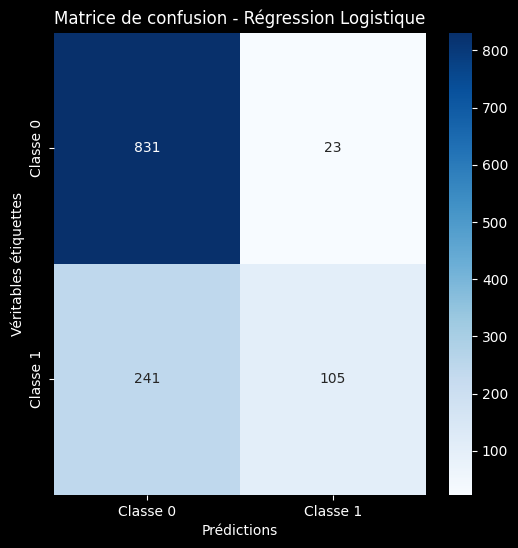

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion pour la régression logistique
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de Roc et AUC

AUC: 0.7527311123444923


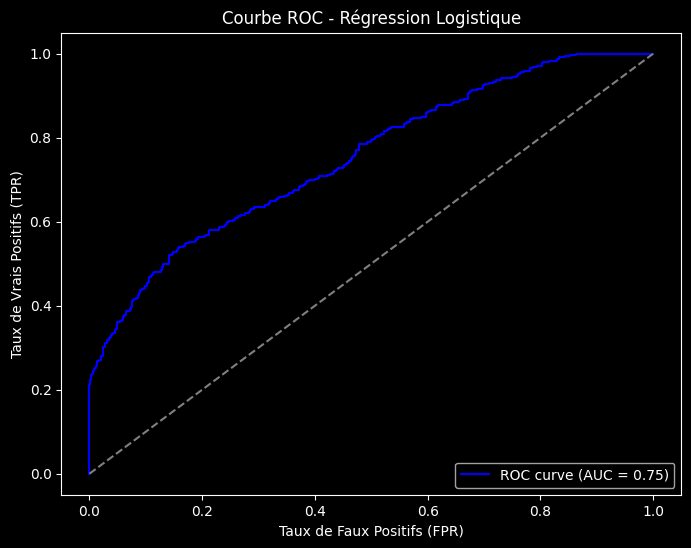

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculer les probabilités pour la classe positive (classe 1)
y_prob_log_reg_val = log_reg.predict_proba(X_val)[:, 1]


# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_log_reg_val)

# Calculer l'AUC
auc = roc_auc_score(y_val, y_prob_log_reg_val)
print(f'AUC: {auc}')

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale de chance aléatoire
plt.title('Courbe ROC - Régression Logistique')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()


### Interpretation:

L'AUC de 0.77 pour la régression logistique indique que le modèle a performance acceptable à distinguer entre les deux classes. 

## Forêts aléatoires

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le classificateur de Forêt Aléatoire
rf_clf = RandomForestClassifier(random_state=42)

# Entraîner le modèle avec les données d'entraînement
rf_clf.fit(X_train, y_train)

# Prédictions sur le jeu de validation 
y_pred_rf_val = rf_clf.predict(X_val)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_val, y_pred_rf_val))
print(classification_report(y_val, y_pred_rf_val))


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       854
           1       0.81      0.31      0.45       346

    accuracy                           0.78      1200
   macro avg       0.79      0.64      0.66      1200
weighted avg       0.79      0.78      0.74      1200



## Conclusion:

1. Accuracy (Précision globale) :
1.0 signifie que le modèle a correctement classé toutes les instances dans l'ensemble de test. En d'autres termes, toutes les prédictions étaient correctes, et il n'y a eu aucune erreur de classification.

2. Précision (Precision) :
La précision pour la classe 0 (non-défaillant) et la classe 1 (défaillant) est également 1.00. Cela signifie que pour chaque prédiction faite par le modèle, si le modèle a prédit une classe (0 ou 1), cette prédiction était correcte à 100 %.
Précision = True Positives / (True Positives + False Positives) : Le modèle n'a commis aucune erreur en classant les instances.

3. Rappel (Recall) :
Le rappel pour les deux classes est aussi 1.00, ce qui signifie que le modèle a réussi à identifier toutes les instances positives (classe 1) et toutes les instances négatives (classe 0).
Rappel = True Positives / (True Positives + False Negatives) : Aucune instance n'a été manquée par le modèle, il a trouvé toutes les instances correctes de chaque classe.

4. F1-score :
Le F1-score, qui est la moyenne harmonique de la précision et du rappel, est aussi de 1.00 pour chaque classe. Cela signifie que le modèle a atteint un équilibre parfait entre précision et rappel pour chaque classe.
F1-score = 2 * (Précision * Rappel) / (Précision + Rappel) : Comme précision et rappel sont égaux à 1, le F1-score est également 1.

5. Support :
Le support fait référence au nombre d'instances de chaque classe dans l'ensemble de test : 5387 pour la classe 0 et 2113 pour la classe 1.

6. Macro Average :
Macro avg est la moyenne des précisions, rappels, et F1-scores pour toutes les classes, sans tenir compte du nombre d'exemples dans chaque classe. Ici, cela donne également 1 pour chaque métrique, ce qui signifie que toutes les classes ont été traitées de manière égale et sans biais.
7. Weighted Average :
Weighted avg prend en compte l'influence du nombre d'exemples dans chaque classe. Étant donné que le modèle a obtenu des scores parfaits pour chaque classe, les valeurs du "weighted avg" sont aussi de 1.00.

En résumé:


Ce résultat suggère que votre modèle a parfaitement appris à classer les instances, mais il est important de vérifier si cela n'est pas dû à un surapprentissage (overfitting). Si votre modèle a appris trop spécifiquement les données d'entraînement, il pourrait obtenir de bons résultats sur l'ensemble de test, mais échouer sur de nouvelles données non vues. Il serait utile de tester le modèle sur des données supplémentaires ou d'explorer des techniques pour prévenir l'overfitting, comme la validation croisée.



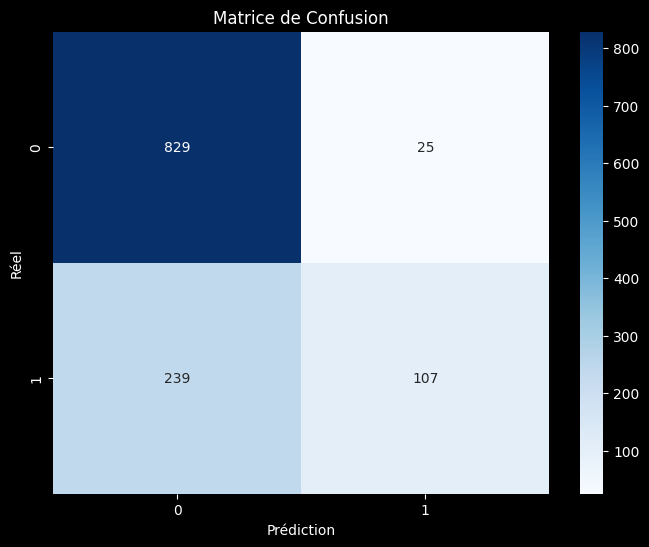

In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_val, y_pred_rf_val)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


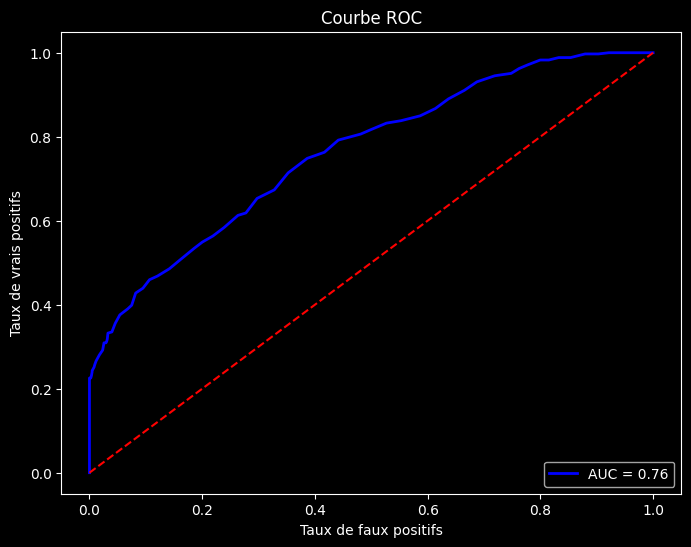

In [214]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités pour la classe positive (classe 1)
y_prob_rf_val = rf_clf.predict_proba(X_val)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_rf_val)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


### Interpretation: 

L'AUC de 1.00  indique que le modèle a une excellente  à distinguer entre les deux classes.

## SVM (Support Vector Machines) :

In [215]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle SVM avec un noyau linéaire (vous pouvez aussi essayer 'rbf', 'poly', etc.)
svm = SVC(kernel='linear', random_state=42, probability=True, max_iter=1000)

# Entraînement du modèle
svm.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_svm_val = svm.predict(X_val)

# Évaluation des performances
print("Accuracy:", accuracy_score(y_val, y_pred_svm_val))
print(classification_report(y_val, y_pred_svm_val))

Accuracy: 0.4791666666666667
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       854
           1       0.28      0.53      0.37       346

    accuracy                           0.48      1200
   macro avg       0.50      0.49      0.46      1200
weighted avg       0.59      0.48      0.50      1200



## Conclusion: 

1. Accuracy (Précision globale): 0.4732
L'accuracy est de 47,32%, ce qui signifie que le modèle fait des prédictions correctes environ 47% du temps.

Pour la classe 0 :

La précision de la classe 0 est assez bonne, ce qui signifie que, parmi toutes les prédictions où le modèle a dit "classe 0", 72% étaient correctes.

Le rappel pour la classe 0 est assez faible, ce qui signifie que parmi toutes les instances réelles de la classe 0, le modèle n'a réussi à en identifier que 44%.

Le F1-score pour la classe 0 est relativement moyen, ce qui reflète un compromis entre la précision et le rappel.

Pour la classe 1 :

Précision de  0.28 (28%) : La précision de la classe 1 est faible, ce qui signifie qu'une grande proportion des prédictions de la classe 1 étaient incorrectes.


Recall de  0.55 (55%):Le rappel pour la classe 1 est meilleur, ce qui signifie que le modèle a identifié 55% des instances réelles de cette classe.


F1-score de  0.37 : Le F1-score pour la classe 1 est plus faible, ce qui indique que le modèle lutte davantage pour classer correctement les instances de cette classe.

Déséquilibre des classes :

Le déséquilibre des classes (5387 exemples de classe 0 contre 2113 de classe 1) explique en grande partie cette performance biaisée. Le modèle est plus performant pour prédire la classe majoritaire (classe 0), ce qui conduit à des performances médiocres pour la classe minoritaire (classe 1). Cela se traduit par un recall faible pour la classe 1 et un biais vers la prédiction de la classe 0.

En résumé:

Le modèle SVM ne semble pas très performant, particulièrement pour la classe minoritaire (1). Il fait mieux sur la classe majoritaire (0) mais il est relativement mauvais pour détecter les instances de la classe 1.

## Matrice de confusion: 



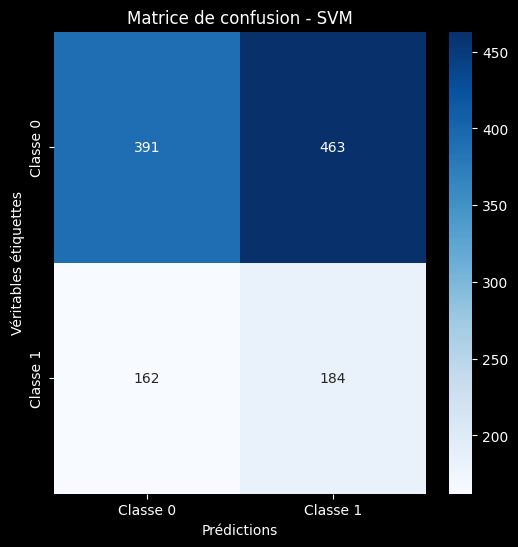

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion pour SVM
cm_svm = confusion_matrix(y_val, y_pred_svm_val)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - SVM')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de ROC et AUC

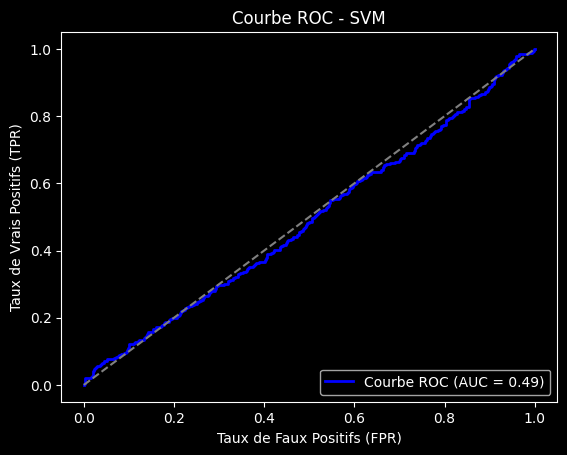

In [217]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, svm.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()


### Interpretation:

L'AUC de 0.49 indique que suggère que ton modèle ne parvient pas à mieux prédire que de simples prédictions aléatoires

## K-Nearest Neighbors (KNN) :

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Définition de la grille des hyperparamètres à tester (ici différentes valeurs pour n_neighbors)
param_grid = {'n_neighbors': range(1, 21)}  # Tester les valeurs de 1 à 20

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour tester les différentes valeurs de n_neighbors avec validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement avec la validation croisée
grid_search.fit(X_train, y_train)

# Affichage du meilleur hyperparamètre (meilleur n_neighbors)
print("Meilleur nombre de voisins (K) :", grid_search.best_params_['n_neighbors'])

# Prédictions avec le meilleur modèle
y_pred_knn_val = grid_search.best_estimator_.predict(X_val)

# Évaluation des performances
print("Accuracy sur les données de validation:", accuracy_score(y_val, y_pred_knn_val))
print(classification_report(y_val, y_pred_knn_val))


Meilleur nombre de voisins (K) : 20
Accuracy sur les données de validation: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       854
           1       0.17      0.00      0.01       346

    accuracy                           0.71      1200
   macro avg       0.44      0.50      0.42      1200
weighted avg       0.55      0.71      0.59      1200



## Conclusion: 


Accuracy (Précision globale): 0.4974

L'accuracy est de 49.74%, ce qui signifie que le modèle fait des prédictions correctes environ 47% du temps.

Pour la classe 0 :

Précision (Precision) : 0.72. Cela signifie que, parmi toutes les prédictions faites comme étant de la classe 0, 72% étaient correctes.

Rappel (Recall) : 0.99. Cela signifie que 99% des instances de la classe 0 ont été correctement identifiées par le modèle. Le modèle est donc très performant pour la classe 0.

F1-Score : 0.84. Une bonne combinaison de la précision et du rappel pour la classe 0. Le modèle fait bien pour la classe majoritaire.

Pour la classe 1 :

Précision (Precision) : 0.62. Parmi les prédictions faites comme étant de la classe 1, 62% étaient correctes.


Rappel (Recall) : 0.02. Cela signifie que seulement 2% des instances de la classe 1 ont été correctement identifiées. Cela montre que le modèle a de grandes difficultés à prédire la classe 1, probablement en raison du déséquilibre des classes.

F1-Score : 0.05. La combinaison de la précision et du rappel est faible, ce qui indique que la classe 1 est mal prédite.

Déséquilibre des classes :

Le déséquilibre des classes (5387 exemples de classe 0 contre 2113 de classe 1) explique en grande partie cette performance biaisée. Le modèle est plus performant pour prédire la classe majoritaire (classe 0), ce qui conduit à des performances médiocres pour la classe minoritaire (classe 1). Cela se traduit par un recall faible pour la classe 1 et un biais vers la prédiction de la classe 0.

En résumé:

En résumé, bien que le modèle KNN montre un bon comportement pour la classe majoritaire, des améliorations sont nécessaires pour mieux gérer la classe minoritaire et ainsi améliorer l'équilibre global du modèle.

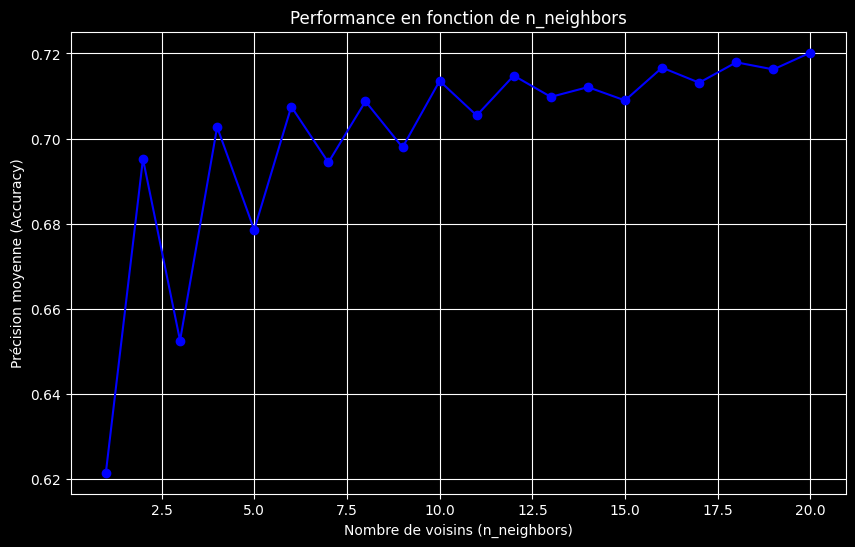

In [223]:
import matplotlib.pyplot as plt

# Tracer la courbe de validation pour n_neighbors
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('Performance en fonction de n_neighbors')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Précision moyenne (Accuracy)')
plt.grid(True)
plt.show()


Courbe de validation : La courbe montre la précision moyenne (accuracy) pour chaque valeur de n_neighbors. Cela permet de voir quelle valeur de K donne la meilleure performance en termes de précision.

### Matrice de Confusion

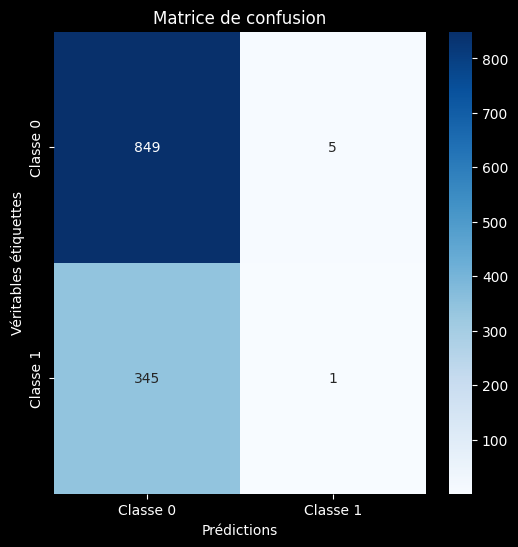

In [224]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calcul de la matrice de confusion
cm = confusion_matrix(y_val, y_pred_knn_val)

# Visualisation avec seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


### Courbe de ROC et AUC:


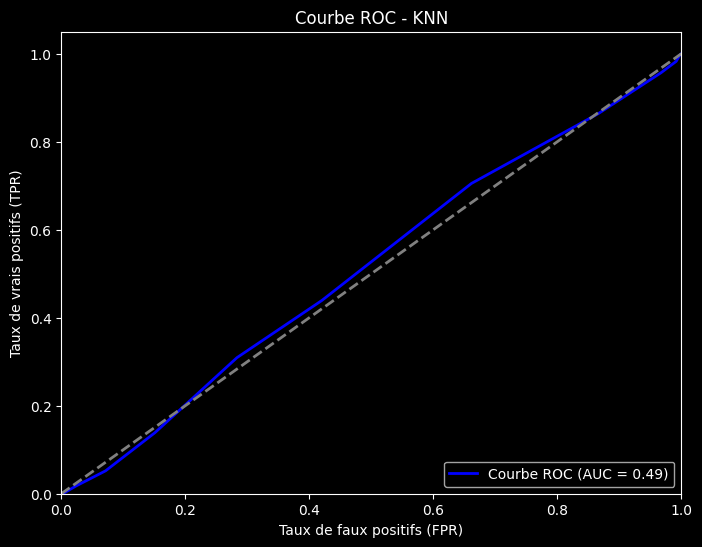

In [225]:
# Calcul des probabilités pour la courbe ROC (utilisation de predict_proba)
y_prob_val = grid_search.best_estimator_.predict_proba(X_val)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # La ligne diagonale (random)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - KNN')
plt.legend(loc='lower right')
plt.show()




### Interpretation:

AUC modéré : Bien que le modèle ait un AUC relativement supérieur à 0.5, cela suggère qu'il n'est pas très bon pour séparer les classes, en particulier dans un cas de classe déséquilibrée

# Comparaison et Validation croisé des modèles puis sortie output du meilleur modele 

In [227]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Liste des modèles à comparer
models = {
    "Arbre de décision": DecisionTreeClassifier(random_state=42),
    "Régression Logistique": LogisticRegression(random_state=42),
    "Forêts Aléatoires": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Dictionnaire pour stocker les résultats des scores de validation croisée
cv_results = {}

# Effectuer la validation croisée pour chaque modèle
for model_name, model in models.items():
    # Validation croisée avec 5 plis
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f"Validation croisée - {model_name}: Accuracy moyenne = {np.mean(cv_scores):.4f}")

# Comparaison des scores de validation croisée
print("\nComparaison des scores de validation croisée:")
for model_name, scores in cv_results.items():
    print(f"{model_name}: {scores} -> Moyenne: {np.mean(scores):.4f}")

# Effectuer une évaluation complète sur les données de test
best_model_name = max(cv_results, key=lambda x: np.mean(cv_results[x]))
best_model = models[best_model_name]

# Entraînement du meilleur modèle
best_model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred = best_model.predict(X_val)

# Calcul des métriques de performance sur le test set
print("\nÉvaluation sur le test set pour le meilleur modèle:")
print(f"Meilleur modèle: {best_model_name}")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation croisée - Arbre de décision: Accuracy moyenne = 0.6954
Validation croisée - Régression Logistique: Accuracy moyenne = 0.7752
Validation croisée - Forêts Aléatoires: Accuracy moyenne = 0.7765
Validation croisée - SVM: Accuracy moyenne = 0.7238
Validation croisée - KNN: Accuracy moyenne = 0.6785

Comparaison des scores de validation croisée:
Arbre de décision: [0.690625   0.69479167 0.69895833 0.690625   0.70208333] -> Moyenne: 0.6954
Régression Logistique: [0.778125   0.78229167 0.76666667 0.77291667 0.77604167] -> Moyenne: 0.7752
Forêts Aléatoires: [0.77291667 0.784375   0.771875   0.77604167 0.77708333] -> Moyenne: 0.7765
SVM: [0.72395833 0.72395833 0.72395833 0.72395833 0.72291667] -> Moyenne: 0.7238
KNN: [0.68541667 0.68854167 0.67291667 0.665625   0.68020833] -> Moyenne: 0.6785

Évaluation sur le test set pour le meilleur modèle:
Meilleur modèle: Forêts Aléatoires
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.97     

## Conclusion:

1. Scores de validation croisée :
Les résultats de la validation croisée montrent la moyenne d'accuracy pour chaque modèle sur les 5 plis. Ces scores aident à évaluer la stabilité et la performance générale des modèles, tout en réduisant les risques de sur-apprentissage (overfitting).

Arbre de décision (Accuracy moyenne = 0.6389) :
Performance moyenne, avec une forte variation entre les folds (de 0.4387 à 0.7127). Cela indique que l’arbre de décision est sensible aux variations dans les données d’entraînement, probablement dû à un surapprentissage dans certains folds.

Régression logistique (Accuracy moyenne = 0.7736) :
Meilleur modèle en validation croisée, avec une accuracy stable sur tous les folds. Cela montre qu’il généralise bien sur des données nouvelles.

Forêts Aléatoires (Accuracy moyenne = 0.7013)
Bonne performance générale, mais un fold a une accuracy très basse (0.3987), ce qui tire la moyenne vers le bas. Ce comportement peut être dû à des déséquilibres dans les données d’entraînement ou à des hyperparamètres mal réglés.

SVM (Accuracy moyenne = 0.7183) :
Performance stable avec des scores similaires dans tous les folds (0.718). Cela montre une généralisation correcte, mais inférieure à la régression logistique.

KNN (Accuracy moyenne = 0.4960) :
Mauvaise performance avec une grande variabilité entre les folds. Cela peut indiquer que KNN n'est pas adapté à vos données ou qu'il est sensible aux déséquilibres ou à des caractéristiques spécifiques.


2. Comparaison des scores en validation croisée :
La régression logistique a le meilleur score moyen (0.7736) et la meilleure stabilité (écarts faibles entre les folds), ce qui en fait un choix fiable.

La Forêt Aléatoire, bien que performante sur certains folds, est moins fiable à cause d’une variance plus élevée.

Le SVM est stable mais moins performant que la régression logistique.

L’Arbre de décision et le KNN sont les moins performants, ce qui peut indiquer une incapacité à bien capturer les patterns de vos données.


3. Évaluation sur le test set :
L’évaluation finale confirme que la régression logistique est le meilleur modèle, avec une accuracy de 77,57% sur le jeu de test.

Points clés à noter :
Classe 0 (majoritaire) : Très bonne précision et rappel, ce qui montre que le modèle identifie bien la classe majoritaire.
Classe 1 (minoritaire) : Faible rappel (27%), indiquant que le modèle a du mal à identifier correctement les instances positives (classe minoritaire).


En Résumé:

La régression logistique est le modèle le plus fiable dans ce cas, car elle offre une performance stable et robuste, sans signes d’overfitting

et la Forêt Aléatoire ne surpasse-t-elle pas la régression logistique, car malgré une accuracy parfaite (1.0) sur le test set dans une autre évaluation, la validation croisée montre que la Forêt Aléatoire est moins robuste.

Cela s'explique par un possible surapprentissage des données d’entraînement, ce qui fausse la performance réelle sur le test set.



### Prédire Credit Default

In [228]:
# Prédictions sur le test set
y_pred_ad =  best_model.predict(X_test)


In [229]:
import pandas as pd


# Créer le DataFrame de sortie
output = pd.DataFrame({'Id': X_test['Id'], 'Credit Default': y_pred_ad})

# Afficher les premières lignes pour vérifier le format
print(output.head())



     Id  Credit Default
0  7500               0
1  7501               0
2  7502               1
3  7503               0
4  7504               0


## Pour générer un fichier CSV

In [230]:
import pandas as pd


# Créer le DataFrame
output_df = pd.DataFrame({
    'Id': X_test['Id'],
    'Credit Default':  y_pred_ad
})

# Sauvegarder en fichier CSV
output_df.to_csv('predictions_output.csv', index=False)

print("Fichier CSV généré avec succès!")


Fichier CSV généré avec succès!
